This Loan Prediction model was last worked on 25/06/2019

I need to transform the dataset: Gender, Married, Education, Self_Employed
Property_Area to standardise it so I can have elegant graphs!!!!


I find this dataset interesting as a first project of the application it has application in retail banking/finance, I believe it is a legal requirement in some countries to explain to the applicant why the loan was declined, and you can drill down and based on xyz, your loan is declined. 

Maybe able to use this data there depending on what the criteria is to explain why it is declined...

https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [1]:
#standard importing your libraries
import numpy as np
import pandas as pd
from numpy import array

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
train = pd.read_csv("TrainData-LoanPrediction.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Step by Step:

Import data

Step 1: Clean the data if required

Step 2: Visualise the date

Step 3: Regression Analysis

Step 4: Machine Learning - this is a Logistic classification problem (because it has a yes or no outcome to predict if the loan should be made or not) 

Interesting to see Education, and Property Area (Urban, Semi Urban, Rural)

What are the high weighted features that determine whether the loan is provided for this company - take an unbias approach that knows nothing about the industry.

Assume Term is monthly data...

- Will have to convert Education to 0 = Not Graduate and 1 = Graduate to unify.
- Rename the columns 'nice to have', to be able to readability

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


There are 614 rows and 13 columns.
Data looks decent. All columns seems relevant at the moment.

General Overview of the Dataset:

The data is relatively clean, however I do see a few nulls, no irrelavant attributes like lender personal details (names, phone number, address) that is not relevant for this exercise.

I drop subset with nulls in 'LoanAmount','Dependents', 'Self_Employed', 'Loan_Amount_Term','Credit_History','Gender'

In [6]:
#This is to standardise the dataset to remove all nulls
train = train.dropna(subset = ['Gender','LoanAmount', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


If I drop the na for these I would get a total of 480 rows instead of 614 rows of invalid data.

For the time being I will drop these data set to be able to have a easier time playing with the data.

In [7]:
#This is a panda function that is really useful to give a feel of a data set especially for large dataset
train.describe()

#mean loan term is about 342 months - and a sd of 65 (quite standard)

#loan amount is about 144k - sd of 80k

#Income varies quite a bit the sd is quite varied


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120b4d940>,
      dtype=object)

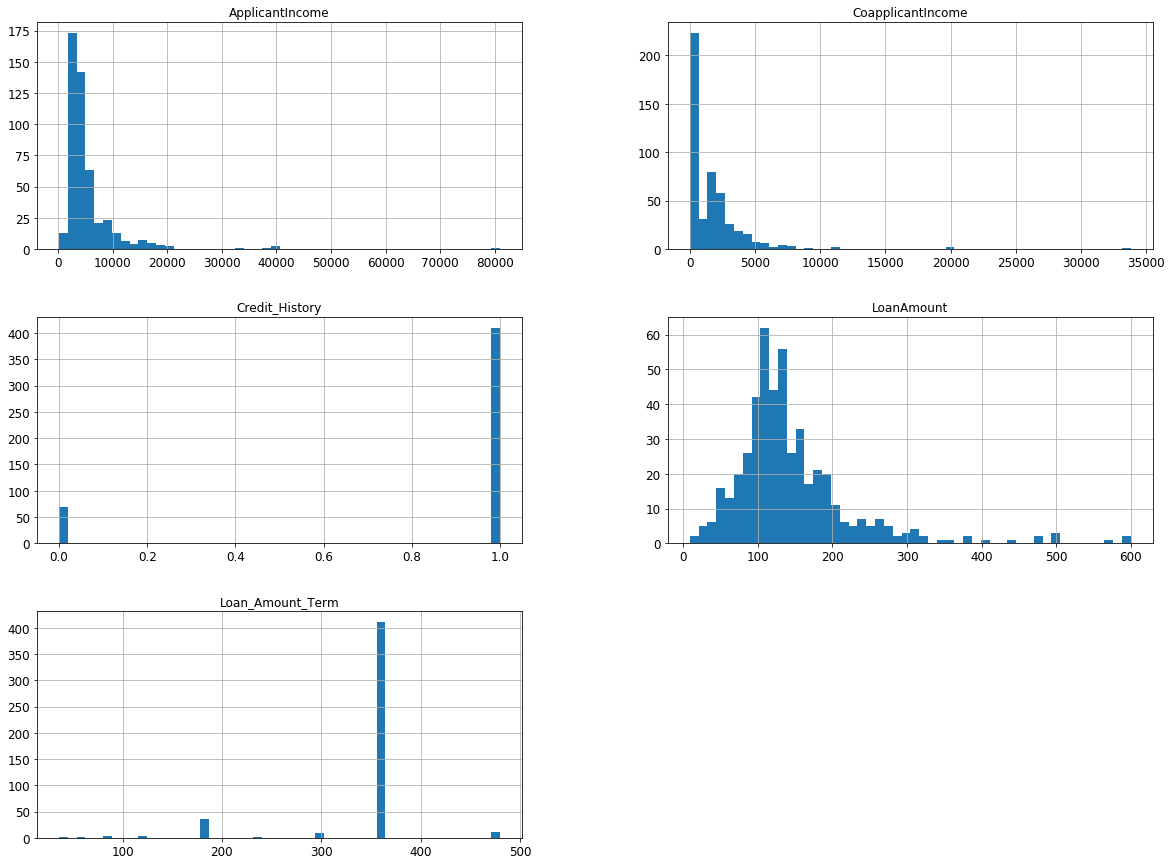

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15)) 